In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("Kraken_BTCUSD_d.csv", header=1)

df["Open_before"] = df["Open"].shift(-1)
df["Open_changes"] = (df["Open"] / df["Open_before"]) - 1

df = df.dropna()

changes = df["Open_changes"]

X = []
Y = []

for i in range(0, len(changes) - 20):
    Y.append(changes[i])
    X.append(np.array(changes[i+1:i+21][::-1]))
    
X = np.array(X).reshape(-1, 20, 1)
Y = np.array(Y)

In [5]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(1, input_shape=(20, 1)))

model.compile(optimizer="rmsprop", loss="mse")
model.fit(X, Y, batch_size=32, epochs=10)

Epoch 1/10
1750/1750 [==============================] - 2s 925us/step - loss: 0.0026
Epoch 2/10
1750/1750 [==============================] - 1s 512us/step - loss: 0.0025
Epoch 3/10
1750/1750 [==============================] - 1s 526us/step - loss: 0.0024
Epoch 4/10
1750/1750 [==============================] - 1s 511us/step - loss: 0.0023
Epoch 5/10
1750/1750 [==============================] - 1s 520us/step - loss: 0.0022
Epoch 6/10
1750/1750 [==============================] - 1s 527us/step - loss: 0.0022
Epoch 7/10
1750/1750 [==============================] - 1s 544us/step - loss: 0.0022
Epoch 8/10
1750/1750 [==============================] - 1s 528us/step - loss: 0.0021
Epoch 9/10
1750/1750 [==============================] - 1s 521us/step - loss: 0.0021
Epoch 10/10
1750/1750 [==============================] - 1s 522us/step - loss: 0.0021


In [6]:
predictions = model.predict(X)

In [7]:
predictions = predictions.reshape(-1)

In [8]:
predictions.shape

(1750,)

In [9]:
len(df)

1770

In [10]:
predictions = np.append(predictions, np.zeros(20))

In [11]:
predictions.shape

(1770,)

In [12]:
df["predictions"] = predictions

In [13]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume From,Volume To,Open_before,Open_changes,predictions
0,2018-08-11,BTCUSD,6141.5,6228.9,5969.6,6228.9,2586.37,15763120.05,6536.0,-0.060358,0.009841
1,2018-08-10,BTCUSD,6536.0,6579.1,6010.0,6141.5,7526.91,47487206.71,6275.9,0.041444,0.018885
2,2018-08-09,BTCUSD,6275.9,6630.5,6179.1,6536.0,5942.17,38175637.90,6717.8,-0.065780,0.013528
3,2018-08-08,BTCUSD,6717.8,6717.8,6120.0,6275.9,9468.23,60523770.56,6935.7,-0.031417,0.011727
4,2018-08-07,BTCUSD,6935.7,7149.0,6659.9,6717.8,6505.50,45042696.31,7026.9,-0.012979,0.012373


In [16]:
df["Open_predicted"] = df["Open_before"] * (1 + df["predictions"])

In [17]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769],
           dtype='int64', length=1770)

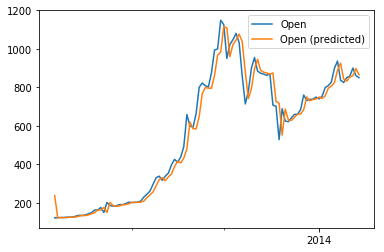

In [21]:

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# format the ticks
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

dates = np.array(df["Date"]).astype(np.datetime64)

plt.plot(dates[-100:], df["Open"][-100:], label="Open")
plt.plot(dates[-100:], df["Open_predicted"][-100:], label="Open (predicted)")

plt.legend()

plt.show()

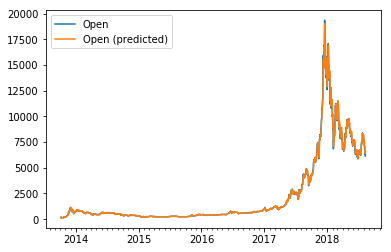

In [22]:

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# format the ticks
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

dates = np.array(df["Date"]).astype(np.datetime64)

plt.plot(dates, df["Open"], label="Open")
plt.plot(dates, df["Open_predicted"], label="Open (predicted)")

plt.legend()

plt.show()